In [2]:
#original data

In [3]:
#original data without any preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data= pd.read_csv("G:\MINOR\d.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


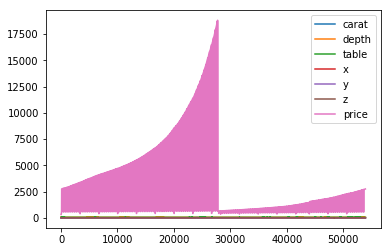

In [5]:
#data=data[[,'carat  ','cut ','color','clarity ','depth  ','table','x','y','z','price']]
data=data[['carat','cut','color','clarity','depth','table','x','y','z','price']]
data.plot()

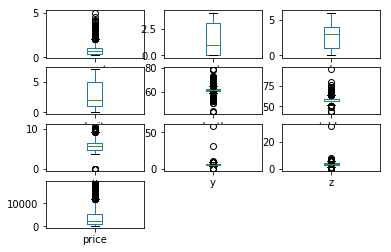

In [6]:
col=data.columns
for i in col:
    if data[i].dtype==np.object:
        s=set(data[i])
        d={}
        for i1,j in enumerate(s):
            d[j]=i1
            
        data[i]=list(map(lambda k:d[k],data[i]))    
#box and whisker plot
data.plot(kind='box', subplots=True,layout=(4,3),sharex=False, sharey=False)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x=data.drop(['price'],axis=1)
y=data['price']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [10]:



from sklearn.linear_model import LinearRegression

In [11]:
reg=LinearRegression()

In [12]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
pred=reg.predict(X_test)
pred

array([ 6258.37813583,  8139.69260191,  6508.83013424, ...,
        9821.51965094, 16174.41657962, 14709.75358466])

In [14]:
print(reg.score(X_test,Y_test))


0.8683816004342263


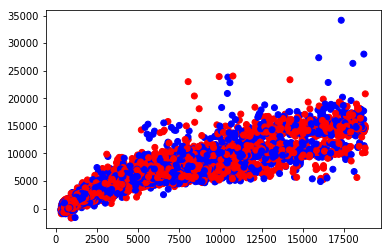

In [15]:
plt.scatter(Y_test,pred,color=['red','blue'])
#plt.scatter(X_test,Y_test,color='red')
#plt.plot(X_train,reg.predict(X_test),color='blue')
#plt.title(' Price Vs Attributes')
#plt.xlabel("attributes")
#plt.ylabel('Price')
#plt.show()


In [16]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor( n_estimators = 15,random_state = 0)
#n_estimators=no. of trees.


In [17]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [18]:
regressor.score(X_test,Y_test)

0.9699803122209287

In [19]:
y_pred=regressor.predict(X_test)

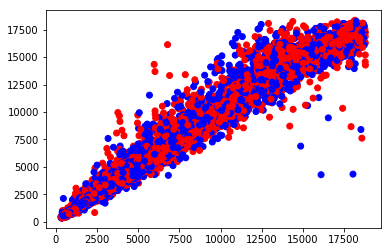

In [20]:
plt.scatter(Y_test,y_pred,color=['red','blue'])


In [21]:
#now using feature selection strategies to make our results more optimized:


In [22]:
#SELECTKBEST METHOD USING CHI2

In [23]:
data.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,0,4,6,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,4,1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,4,4,5,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,6,2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,4,5,6,63.3,58.0,4.34,4.35,2.75,335


In [24]:
data.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.156488,0.150314,0.131000,0.028224,0.181618,0.975094,0.951722,0.953387,0.921591
cut,0.156488,1.000000,0.013410,0.021867,0.002287,0.508439,0.158917,0.144037,0.147723,0.092506
color,0.150314,0.013410,1.000000,0.003551,0.021226,0.023180,0.132068,0.129112,0.132096,0.075288
clarity,0.131000,0.021867,0.003551,1.000000,-0.016646,0.022986,0.128194,0.125866,0.123465,0.078739
depth,0.028224,0.002287,0.021226,-0.016646,1.000000,-0.295779,-0.025289,-0.029341,0.094924,-0.010647
table,0.181618,0.508439,0.023180,0.022986,-0.295779,1.000000,0.195344,0.183760,0.150929,0.127134
x,0.975094,0.158917,0.132068,0.128194,-0.025289,0.195344,1.000000,0.974701,0.970772,0.884435
y,0.951722,0.144037,0.129112,0.125866,-0.029341,0.183760,0.974701,1.000000,0.952006,0.865421
z,0.953387,0.147723,0.132096,0.123465,0.094924,0.150929,0.970772,0.952006,1.000000,0.861249
price,0.921591,0.092506,0.075288,0.078739,-0.010647,0.127134,0.884435,0.865421,0.861249,1.000000


In [25]:
#here we find that price attribute has a -ve co-relation with depth,color,clarity;
#hence we can drop these attribute and work with the other attributes for our prediction.
#we can consider more feature extraction methods as well



In [26]:
from sklearn.feature_selection import RFE,SelectKBest,chi2

In [27]:
test=SelectKBest(score_func=chi2,k=9)
fit=test.fit(x,y)
np.set_printoptions(precision=3)

In [28]:
fit.scores_

array([14536.165, 22561.106, 23563.137, 26441.123,   445.29 ,  1255.639,
       11379.895, 11359.088,  7036.106])

In [29]:
#the highest scores features can be selected as our requied dataset
#data=data[['carat','cut','color','clarity','depth','table','x','y','z','price']]
#the lowest score is of: depth (445.29)
#we can drop this attribute.


In [30]:
data=data[['carat','cut','color','clarity','table','x','y','z','price']]
#dropped depth

In [31]:
x=data.drop(['price'],axis=1)
y=data['price']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [32]:
reg.fit(X_train,Y_train)
pred=reg.predict(X_test)

In [33]:
reg.score(X_test,Y_test)

0.8653086139402142

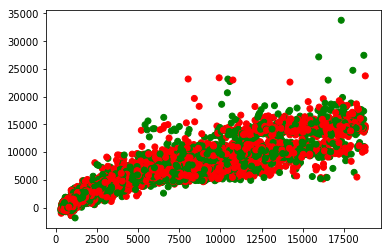

In [34]:
plt.scatter(Y_test,pred,color=['red','green'])

In [35]:
regressor.fit(X_train,Y_train)
pred=regressor.predict(X_test)

In [36]:
regressor.score(X_test,Y_test)

0.9726964435777944

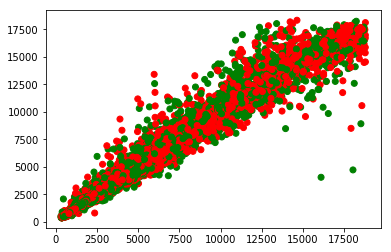

In [37]:
plt.scatter(Y_test,pred,color=['red','green'])

In [38]:
#USING PCA 

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca=PCA(n_components=None)
#to visualize the dataset
#check how the features are varying.
fit=pca.fit(X_train)
fit.explained_variance_ratio_
#gives the variance given by each component to the dataset

array([0.33 , 0.248, 0.197, 0.145, 0.074, 0.003, 0.001, 0.001])

In [41]:
#now transforming the dataset with principal components =6

In [42]:
pca=PCA(n_components=6)

In [43]:
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

In [44]:
#X_train

In [45]:
fit.explained_variance_ratio_

array([0.33 , 0.248, 0.197, 0.145, 0.074, 0.003, 0.001, 0.001])

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [47]:
reg.fit(X_train,Y_train)
pred=reg.predict(X_test)
reg.score(X_test,Y_test)

0.8653086139402142

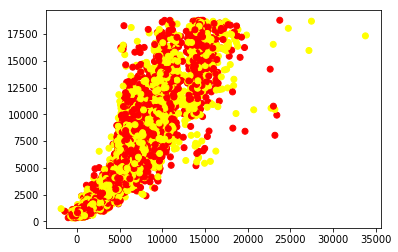

In [48]:
plt.scatter(pred,Y_test,color=['red','yellow'])

In [49]:
regressor.fit(X_train,Y_train)
pred=regressor.predict(X_test)
regressor.score(X_test,Y_test)

0.9726964435777944

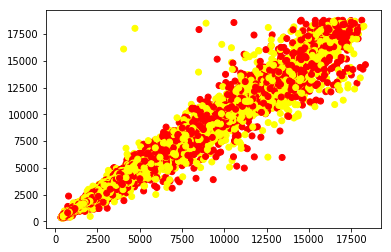

In [50]:
plt.scatter(pred,Y_test,color=['red','yellow'])


In [51]:
#using Recursive feature extraction
data.head()

,carat,cut,color,clarity,table,x,y,z,price
0,0.23,0,4,6,55.0,3.95,3.98,2.43,326
1,0.21,3,4,1,61.0,3.89,3.84,2.31,326
2,0.23,4,4,5,65.0,4.05,4.07,2.31,327
3,0.29,3,6,2,58.0,4.20,4.23,2.63,334
4,0.31,4,5,6,58.0,4.34,4.35,2.75,335


In [52]:
 from sklearn.feature_selection import RFE

In [53]:
model=LinearRegression()
rfe=RFE(model,5)
fit1=rfe.fit(X_train,Y_train)


In [54]:
fit1.n_features_

5

In [55]:
data.head(1)

,carat,cut,color,clarity,table,x,y,z,price
0,0.23,0,4,6,55.0,3.95,3.98,2.43,326


In [56]:
fit1.support_

array([ True,  True,  True, False, False,  True, False,  True])

In [57]:
fit1.ranking_

array([1, 1, 1, 3, 4, 1, 2, 1])

In [58]:
#if we go by the ranking
#x=data[['carat','cut','color']]
x=data[['carat','clarity','x','y','z']]


In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [60]:
reg.fit(X_train,Y_train)
pred=reg.predict(X_test)
reg.score(X_test,Y_test)

0.8581346356173909

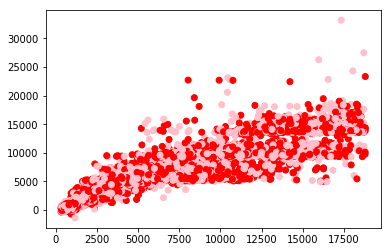

In [61]:
plt.scatter(Y_test,pred,color=['red','pink'])

In [62]:
regressor.fit(X_train,Y_train)
pred=regressor.predict(X_test)
regressor.score(X_test,Y_test)

0.9269359093772966

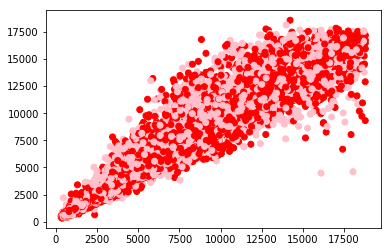

In [63]:
plt.scatter(Y_test,pred,color=['red','pink'])

In [64]:
#using ensemble models

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(X_train, Y_train)
model.score(X_test,Y_test)

0.9336278381547473

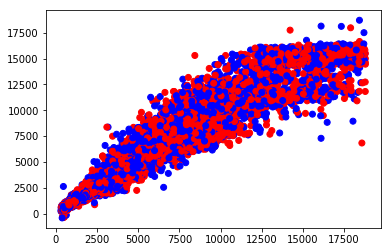

In [66]:
pred=model.predict(X_test)
plt.scatter(Y_test,pred,color=['red','blue'])

In [67]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train, Y_train)
model.score(X_test,Y_test)

0.9320149243942399

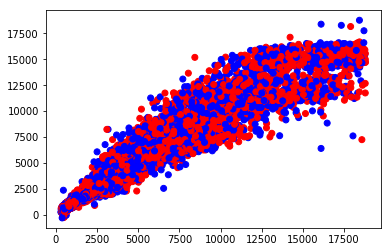

In [68]:
pred=model.predict(X_test)
plt.scatter(Y_test,pred,color=['red','blue'])

In [69]:
#bagging 
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(X_train, Y_train)
model.score(X_test,Y_test)

0.9254523253797896

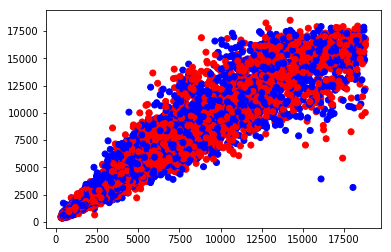

In [70]:
pred=model.predict(X_test)
plt.scatter(Y_test,pred,color=['red','blue'])

In [71]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, Y_train)
model.score(X_test,Y_test)

0.8596727475988118

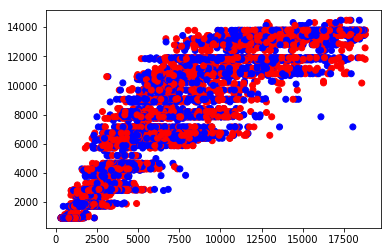

In [72]:
pred=model.predict(X_test)
plt.scatter(Y_test,pred,color=['red','blue'])

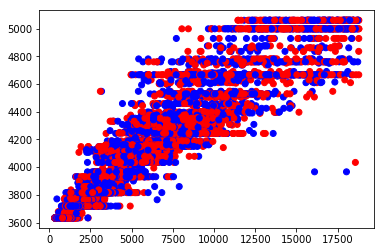

In [73]:
import lightgbm as lgb
train_data=lgb.Dataset(X_train,label=Y_train)
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100)
pred=model.predict(X_test)
plt.scatter(Y_test,pred,color=['red','blue'])

In [74]:
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(pred,Y_test)**0.5


In [75]:
#using ensemble with all the attributes
x=data.drop(['price'],axis=1)
y=data['price']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [76]:
model= GradientBoostingRegressor()
model.fit(X_train, Y_train)
model.score(X_test,Y_test)
#93 -95​#93 -95

0.958392303362048

In [77]:
model = AdaBoostRegressor()
model.fit(X_train, Y_train)
model.score(X_test,Y_test)
#85-88

0.8707105358921494

In [78]:
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(X_train, Y_train)
model.score(X_test,Y_test)
#92-97

0.9718816499645281

In [79]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [80]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
reg.predict(X_test)

array([ 6240.255,  8212.119,  6381.027, ...,  9605.34 , 16009.864,
       13838.971])

In [82]:
reg.score(X_test,Y_test)

0.8653086139402142